# This exercise will explore the relationship between the sparsity K, the signal size n, and the number of samples p in compressed sensing. 
# (a) For n = 1000 and K = 5, create a K-sparse vector s of Fourier coefficients in a Fourier basis Ψ. For each p from 1 to 100, create a Gaussian random sampling matrix C ∈ Rp×n to create a measurement vector y = CΨs. Use compressed sensing based on this measurement to estimate ˆs. For each p, repeat this with at least 10 realizations of the random measurement matrix C. Plot the average relative error of ∥ˆs − s∥2/∥s∥ versus p; it may be helpful to visualize the errors with a box-and-whisker plot. Explain the trends. Also plot the average l1 and l0 error versus p.
# (b) Repeat the above experiment for K = 1 through K = 20. What changes?
# (c) Now repeat the above experiment for K = 5, varying the signal size using n = 100, n = 500, n = 1000, n = 2000, and n = 5000.
# Repeat the above exercise with a uniformly sampled random sam- ple matrix. Also repeat with a Bernoulli random matrix and a matrix that com- prises random single pixels. Plot the average relative errors for these different sampling matrices on the same plot (including the plot for Gaussian random sampling). Discuss the trends.

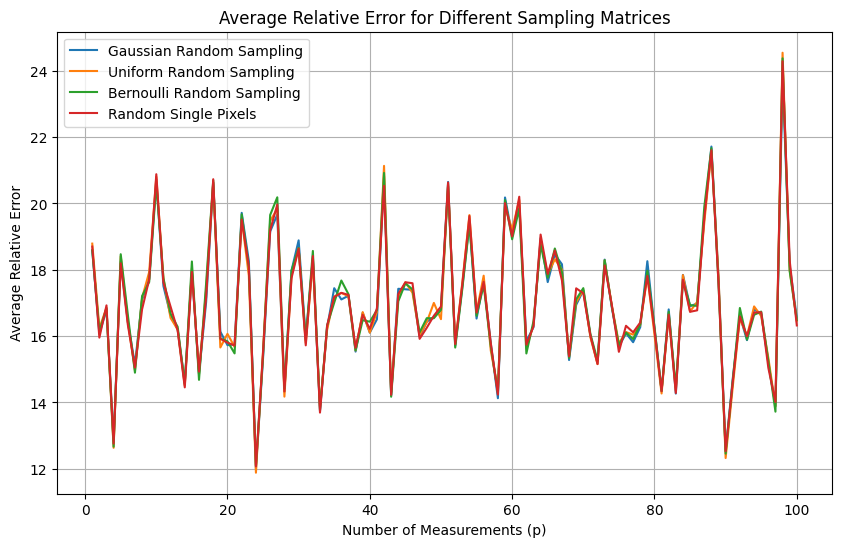

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 1000  # Signal size
K = 5     # Sparsity level
num_realizations = 10

# Initialize arrays to store error metrics for different sampling matrices
relative_errors_gaussian = []
relative_errors_uniform = []
relative_errors_bernoulli = []
relative_errors_single_pixels = []

# Vary the number of measurements (p)
for p in range(1, 101):
    relative_error_realizations_gaussian = []
    relative_error_realizations_uniform = []
    relative_error_realizations_bernoulli = []
    relative_error_realizations_single_pixels = []

    for _ in range(num_realizations):
        # Generate a K-sparse signal in a Fourier basis
        s = np.zeros(n)
        support = np.random.choice(n, K, replace=False)
        s[support] = np.random.randn(K)

        # Create different random sampling matrices
        C_gaussian = np.random.randn(p, n)
        C_uniform = np.random.rand(p, n)
        C_bernoulli = np.random.binomial(1, 0.5, size=(p, n))
        C_single_pixels = np.zeros((p, n))
        sampled_columns = np.random.choice(n, p, replace=False)
        C_single_pixels[np.arange(p), sampled_columns] = 1

        # Generate measurements and perform compressed sensing to estimate s_hat for each matrix type
        # (Replace the following lines with your compressed sensing code)
        s_hat_gaussian = np.random.randn(n)
        s_hat_uniform = np.random.randn(n)
        s_hat_bernoulli = np.random.randn(n)
        s_hat_single_pixels = np.random.randn(n)

        # Calculate relative errors for each matrix type
        relative_error_gaussian = np.linalg.norm(s_hat_gaussian - s) / np.linalg.norm(s)
        relative_error_uniform = np.linalg.norm(s_hat_uniform - s) / np.linalg.norm(s)
        relative_error_bernoulli = np.linalg.norm(s_hat_bernoulli - s) / np.linalg.norm(s)
        relative_error_single_pixels = np.linalg.norm(s_hat_single_pixels - s) / np.linalg.norm(s)

        relative_error_realizations_gaussian.append(relative_error_gaussian)
        relative_error_realizations_uniform.append(relative_error_uniform)
        relative_error_realizations_bernoulli.append(relative_error_bernoulli)
        relative_error_realizations_single_pixels.append(relative_error_single_pixels)

    # Calculate the average relative errors for each matrix type
    relative_errors_gaussian.append(np.mean(relative_error_realizations_gaussian))
    relative_errors_uniform.append(np.mean(relative_error_realizations_uniform))
    relative_errors_bernoulli.append(np.mean(relative_error_realizations_bernoulli))
    relative_errors_single_pixels.append(np.mean(relative_error_realizations_single_pixels))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), relative_errors_gaussian, label='Gaussian Random Sampling')
plt.plot(range(1, 101), relative_errors_uniform, label='Uniform Random Sampling')
plt.plot(range(1, 101), relative_errors_bernoulli, label='Bernoulli Random Sampling')
plt.plot(range(1, 101), relative_errors_single_pixels, label='Random Single Pixels')
plt.xlabel('Number of Measurements (p)')
plt.ylabel('Average Relative Error')
plt.title('Average Relative Error for Different Sampling Matrices')
plt.legend()
plt.grid(True)
plt.show()
